In [7]:
import glob,os
import numpy as np
import pandas as pd
import re

# import astropy
import GCRCatalogs as gcr
from astropy.table import Table, setdiff, vstack, join

import matplotlib.pyplot as plt
plt.style.use('MNRAS.mplstyle')

h = 0.71
file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"
filepath = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/'
filepath1 = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/FixedDepth=60/'

# Load the cylinder richness data of the different depths

In [8]:
def load_and_process_data(file_path, varying_quantity):
    filename = f"RichnessDepth-Data/RichnessDepth_{varying_quantity}_60_035_05.dat"
    data_unsorted = Table.read(file_path + filename, format='ascii')
    
    data_sorted = Table(np.sort(data_unsorted, order='lam'))[::-1]
    print(f'D{varying_quantity}' ,len(data_sorted), len(np.unique(data_sorted['pixelid'])))
    
    return data_sorted

# Load and process richness data for different depths
cluster_CC9 = load_and_process_data(filepath1, 'ColorCut9')  ### CC=Color Cut
cluster_CC20 = load_and_process_data(filepath1, 'ColorCut20') 
cluster_CC50 = load_and_process_data(filepath1, 'ColorCut50')
cluster_CC100 = load_and_process_data(filepath1, 'ColorCut100')
cluster_CC500 = load_and_process_data(filepath1, 'ColorCut500')
# clusterZC0101 = load_and_process_data(filepath1, 'ZCut0101')
# clusterZC0303 = load_and_process_data(filepath1, 'ZCut0303')  ### ZC = Z Cut
# clusterZC11 = load_and_process_data(filepath1, 'ZCut11')  #284612

DColorCut9 224981 1568
DColorCut20 273693 1568
DColorCut50 284058 1568
DColorCut100 284612 1568
DColorCut500 285238 1568


# Load cluster-halos matched (RedMaPPer)

In [9]:
cluster_halos_red = pd.read_pickle(file_path + 'halos/halos_redmapper_withh_mthd2.csv')
print(len(cluster_halos_red))
cluster_halos_red = cluster_halos_red[(cluster_halos_red['redshift']>=0.35) & (cluster_halos_red['redshift']<0.5)]
cluster_halos_red = cluster_halos_red.sort_values(by='richness',ascending=False)
print(len(cluster_halos_red))
cluster_halos_red[:3]

37798
7791


,cluster_id,richness,dec,redshift_1,clusters/z_lambda,clusters/mem_match_id,ra,halo_id,baseDC2/sod_halo_mass,halo_mass,redshift,baseDC2/sod_halo_radius,pixel_id,comoving_dis,Angular_dis,radius,sigma,DS
12449,8,283.304352,-48.635477,0.408346,0.408346,8,36.647026,387810675347,9.464646e+14,1.659895e+15,0.405861,1.971059,10675,1111.686563,790.751602,"[0.13573909765215844, 0.2088776605214819, 0.33...","[1667395545554050.8, 999117086340109.2, 647440...","[-146111734958106.16, -358217093774667.2, -405..."
1667,25,269.696899,-39.456496,0.421540,0.421540,25,30.952695,49010059347,7.557875e+14,1.111478e+15,0.420646,1.828652,10059,1148.090008,808.146283,"[0.12825113863145365, 0.2072021763074542, 0.33...","[1028035767934605.9, 773795640706367.1, 556093...","[34801889736452.812, -8762735299973.348, -2401..."
6886,21,261.199890,-49.252437,0.481522,0.481522,21,60.397077,205510794331,6.594539e+14,1.036123e+15,0.486781,1.788555,10794,1307.411713,879.357581,"[0.12940199905498917, 0.21556486945853923, 0.3...","[1692054261412283.2, 1168227275593436.8, 47180...","[-281722474350221.5, -566377713336343.9, -5870..."


# Load Halos data with Weak lensing profiles

In [10]:
## Sigma and DS profile
sigma_ds_profile = pd.read_pickle(file_path + 'WL-Signal/skysim-full-DS_S-2152757.csv')
print(len(sigma_ds_profile))
sigma_ds_profile[:3]

2152757


,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id,comoving_dis,Angular_dis,radius,sigma,DS
0,2.657907e+13,0.544625,0.201397,-40.048467,0.997962,2.996808e+13,0.722143,21510048411,4.220856e+13,10048,578.542239,481.558077,"[0.1308730625060924, 0.20814712387717377, 0.33...","[115148363120795.56, 51872210454439.24, 229531...","[-130550254502468.84, -76217790266760.5, -3994..."
1,1.219647e+13,0.420254,0.202359,-39.682840,0.997031,1.328618e+13,0.668087,25010048411,1.871292e+13,10048,581.180475,483.367013,"[0.13261201512396317, 0.20923342305629689, 0.3...","[7445362739885.1875, 8543016543686.46, -375534...","[-51159678940917.43, -21245333215964.383, -223..."
2,3.727315e+13,0.609587,0.201278,-41.671626,0.997201,4.826852e+13,0.013165,25410048411,6.798383e+13,10048,578.216572,481.334566,"[0.13437702148667455, 0.21206787125180884, 0.3...","[98287762786790.84, 51371879042919.66, -144157...","[-171453712604657.56, -101776907593780.67, -73..."


# Merge halos with clusters

In [12]:
# List of cluster tables and suffix values
cluster_CC9 = cluster_CC9.to_pandas()
cluster_CC20 = cluster_CC20.to_pandas()
cluster_CC50 = cluster_CC50.to_pandas()
cluster_CC100 = cluster_CC100.to_pandas()
cluster_CC500 = cluster_CC500.to_pandas()
# clusterZC0101 = clusterZC0101.to_pandas()
# clusterZC0303 =  clusterZC0303.to_pandas() ### ZC = Z Cut
# clusterZC11 = clusterZC11.to_pandas()

# cluster_tables = [cluster_05, cluster_1,cluster_30, cluster_60, cluster_90, cluster_120]
# suffix_values = [0.5, 1, 30, 60, 90, 120]
# cluster_CC9, cluster_CC20, cluster_CC50, cluster_CC100, cluster_CC500, clusterZC0101, clusterZC0303, clusterZC11
cluster_tables = [cluster_CC9, cluster_CC20, cluster_CC50, cluster_CC100, cluster_CC500]  #0, cluster_150, cluster_180, cluster_210
suffix_values = [9, 20, 50, 100, 500] ## 9, 20, 50, 100, 500, '0101', '0303', 11

# Dictionary to store the halo tables dynamically
halo_cluster_tables = {}

# Iterate over the tables and suffix values
for i, (cluster_table, suffix) in enumerate(zip(cluster_tables, suffix_values), 1):
    halo_table_name = f"cluster_halo_{suffix}"

    # Perform the join and other operations
    halo_table = pd.merge(sigma_ds_profile,cluster_table, left_on='halo_id',right_on='haloid', how='inner').sort_values(by='lam', ascending=False)
    halo_cluster_tables[halo_table_name] = halo_table
    print(f"Length of {halo_table_name}: {len(halo_table)}")

cluster_halo_CC9 = halo_cluster_tables['cluster_halo_9']
cluster_halo_CC20 = halo_cluster_tables['cluster_halo_20']
cluster_halo_CC50 = halo_cluster_tables['cluster_halo_50']
cluster_halo_CC100 = halo_cluster_tables['cluster_halo_100']
cluster_halo_CC500 = halo_cluster_tables['cluster_halo_500']
# cluster_halo_ZC0101 =halo_cluster_tables['cluster_halo_0101']
# cluster_halo_ZC0303 = halo_cluster_tables['cluster_halo_0303']
# cluster_halo_ZC11 = halo_cluster_tables['cluster_halo_11']

Length of cluster_halo_9: 224981
Length of cluster_halo_20: 273693
Length of cluster_halo_50: 284058
Length of cluster_halo_100: 284612
Length of cluster_halo_500: 285238


In [13]:
lamranges = [(20,30), (30,45), (45,60), (60,500)]
lamlabels = ['(20,30]', '(30,45]', '(45,60]', '(60,500]']
cluster_halos_red['lambda_range'] = pd.cut(cluster_halos_red['richness'], bins=[r[0] for r in lamranges] + [lamranges[-1][-1]], labels=lamlabels)

grouped_cl_halos_red = cluster_halos_red.groupby(['lambda_range'])

In [14]:
## Weighted Profile
def stacked_profile_weighted_by_mass_redshift(lnM_select, z_select, prof_select, lnM_all, z_all, profile_A, dm=0.1, dz=0.05):
    #### set up the bins for mass and redshift  (sigma_select/profile_select, sigma_all/profile_all)
    min_m = min(lnM_select)#-dm
    max_m = max(lnM_select)#+dm
    min_z = min(z_select)#-dz
    max_z = max(z_select)#+dz

    # print('z', min_z, max_z)
    m_bins = np.arange(min_m, max_m+dm, dm)
    z_bins = np.arange(min_z, max_z+dz, dz)
    nM = len(m_bins)-1
    nz = len(z_bins)-1
    # print('nM, nz', nM, nz)

    profile_select = np.array([i.tolist() for i in prof_select])
    profile_all = np.array([i.tolist() for i in profile_A])

    nr = np.shape(profile_select)[1]#rbp.nbins_phys_mpc...1
    profile_weighted = np.zeros(nr)
    weight_norm = 0


    pdf1_list = np.zeros([nz, nM]) # see how many bins are too narrow
    pdf2_list = np.zeros([nz, nM]) # see how many bins are too narrow

    for iz in range(nz):
        z_lo = z_bins[iz]
        z_hi = z_bins[iz+1]
        # print(z_lo,z_hi)
        for iM in range(nM):
            m_lo = m_bins[iM]
            m_hi = m_bins[iM+1]
            # print(m_lo, m_hi)
            
            select_bin = (lnM_select >= m_lo)&(lnM_select < m_hi)&(z_select>=z_lo)&(z_select<z_hi)
            weight = len(lnM_select[select_bin]) * 1.
            # print(weight, len(lnM_select[select_bin]),lnM_select[select_bin])
            weight_norm += weight
            # print(weight_norm)
            select_all = (lnM_all >= m_lo)&(lnM_all < m_hi)&(z_all>=z_lo)&(z_all<z_hi)

            pdf1_list[iz, iM] = weight
            # print(pdf1_list)
            pdf2_list[iz, iM] = len(lnM_all[select_all])
            # print(pdf2_list)

            if weight > 0 and len(lnM_all[select_all]) > 0:
                # print(weight, len(lnM_all[select_all]))
                # if weight == len(lnM_all[select_all]):
                    # print('bin is too narrow!')
                profile_weighted += (np.mean(profile_all[select_all, :], axis=0)*weight) #0
                #profile_weighted += np.nan_to_num(np.mean(profile_all[select_all, :], axis=0)*weight)
            #profile_weighted = np.nan_to_num(profile_weighted)
    profile_weighted /= weight_norm

    pdf1_list = np.concatenate(pdf1_list)
    pdf2_list = np.concatenate(pdf2_list)
    diff_list = pdf2_list - pdf1_list
    # print('pdf1==pdf2', len(diff_list[diff_list == 0]), 'out of', len(diff_list))

    return profile_weighted

/global/homes/k/kamau/clmmdesc/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


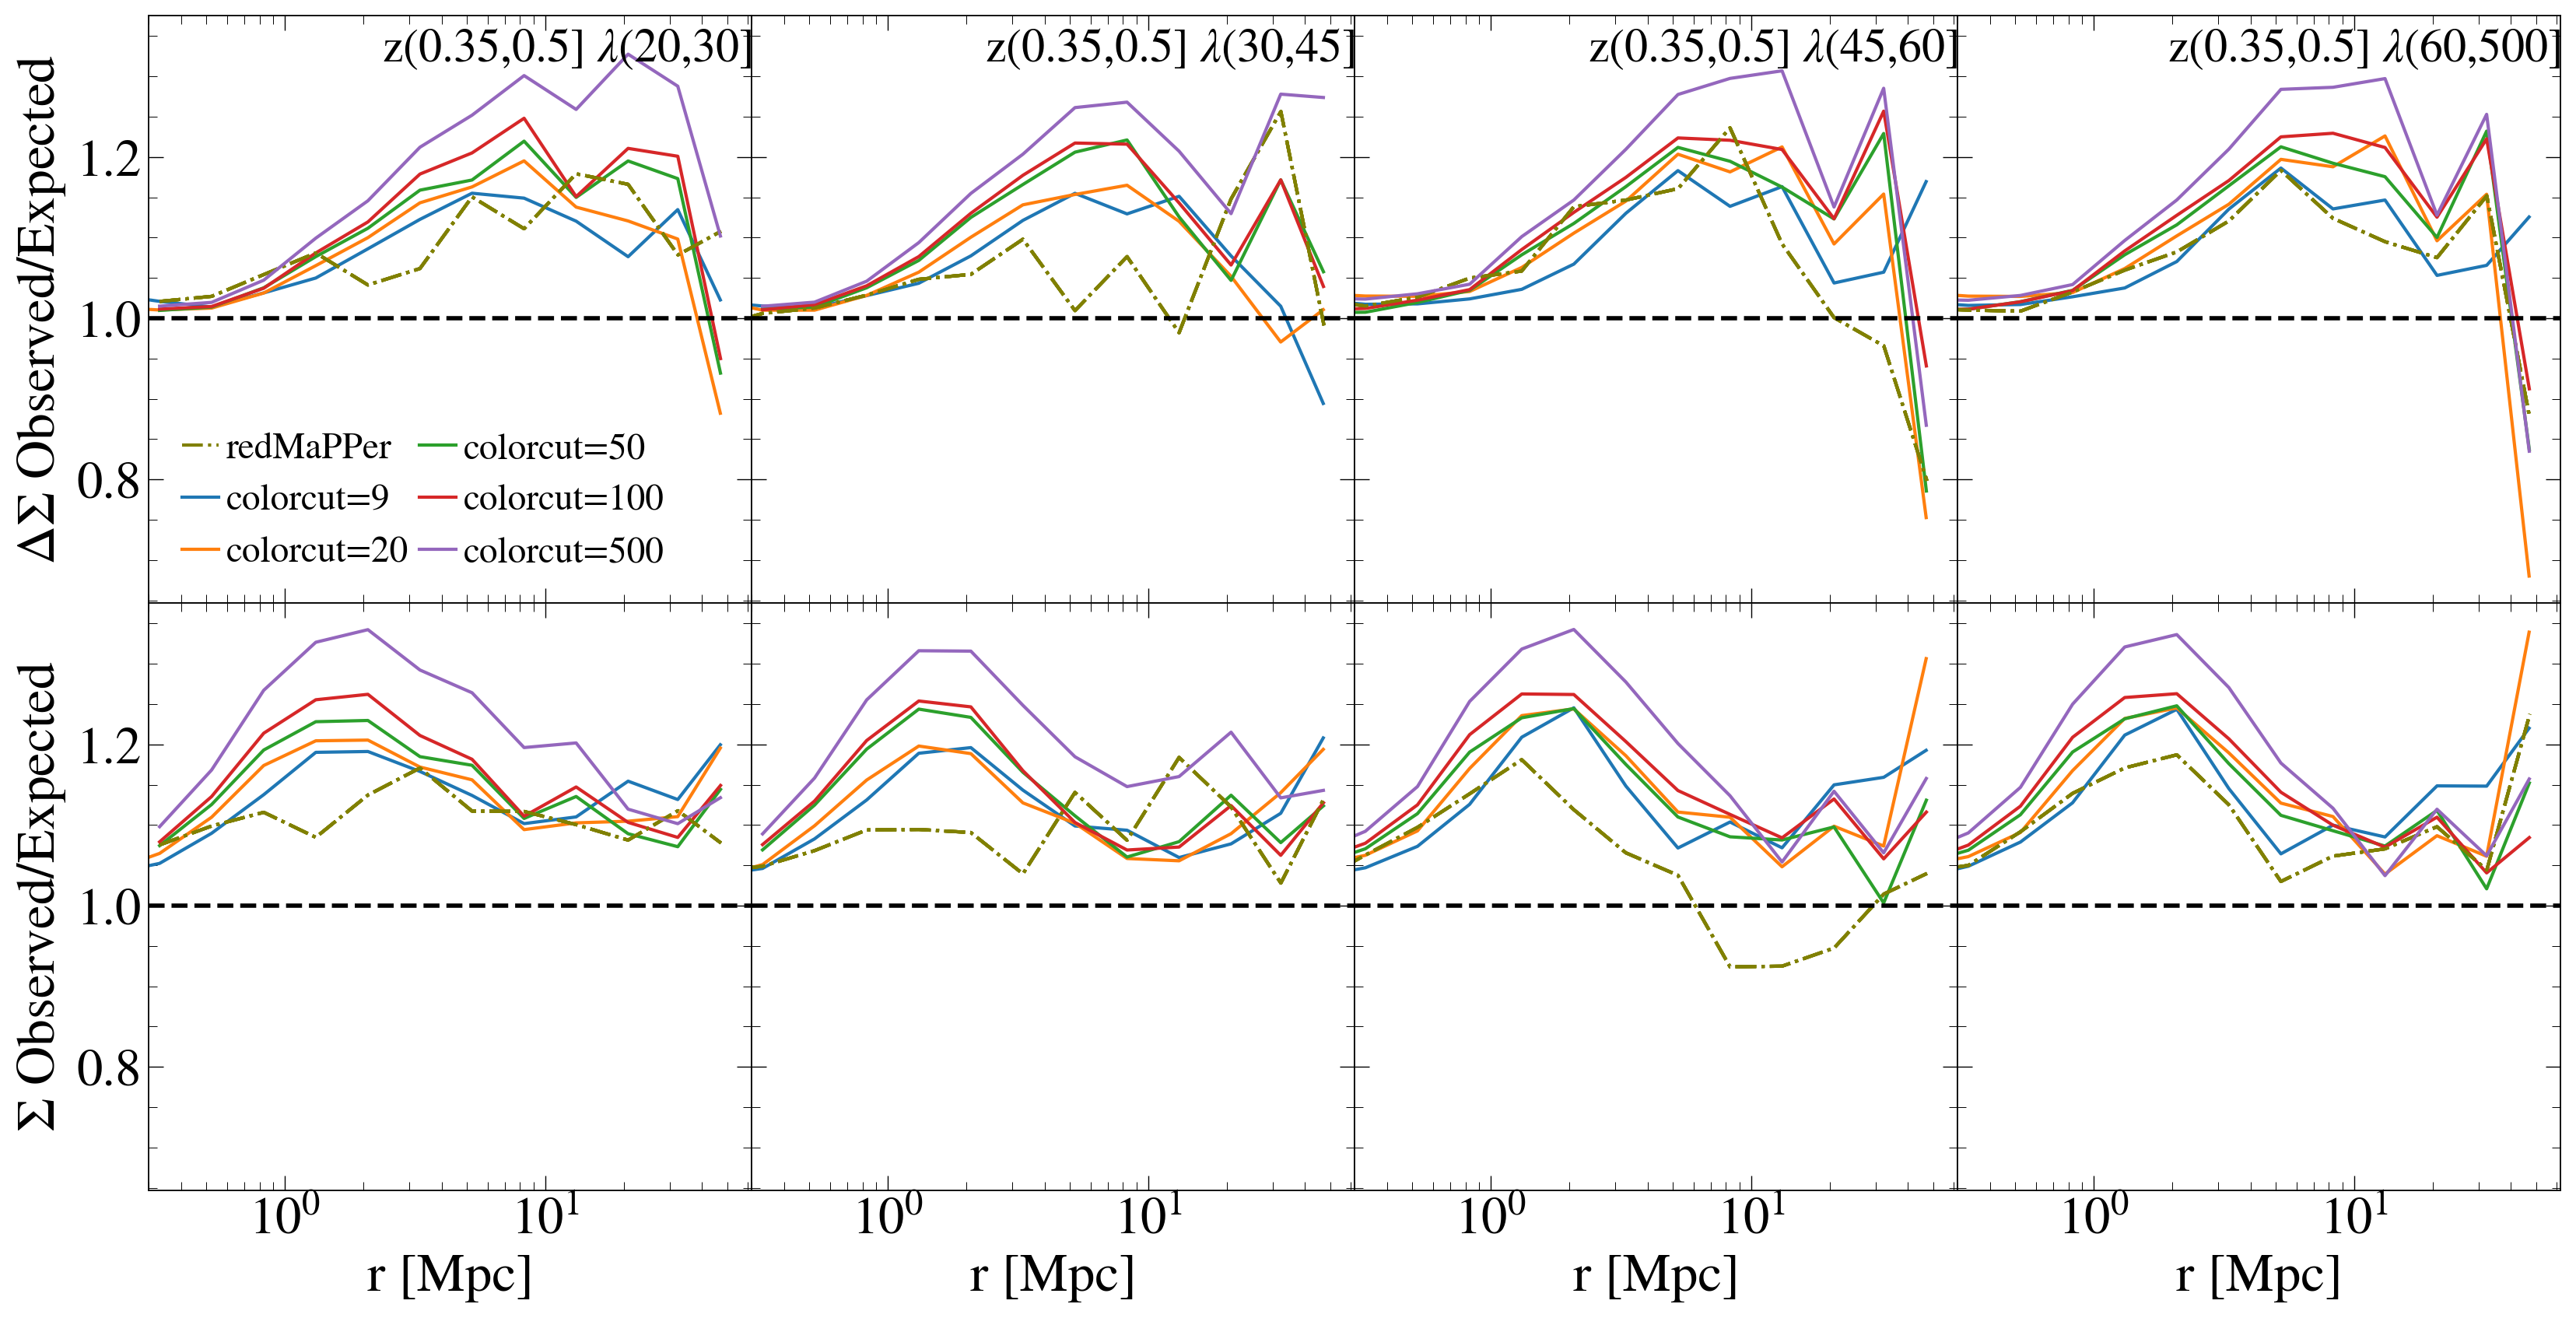

In [55]:
underlying_halos = sigma_ds_profile[(sigma_ds_profile['redshift'] >= 0.35) & (sigma_ds_profile['redshift'] < 0.5)]
lnM_All = np.log10(underlying_halos['baseDC2/sod_halo_mass'])
z_All = underlying_halos['redshift']
profile_All = underlying_halos['sigma']
profile_All_ds = underlying_halos['DS']

# Function to select clusters based on lambda values and calculate ratios
def select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All):
    sel_clusters = cluster_halo.nlargest(num_clusters_in_bin, 'lam')
    cluster_halo = cluster_halo.drop(sel_clusters.index)
    lnM_sel = np.log10(sel_clusters['baseDC2/sod_halo_mass'])
    z_sel = sel_clusters['redshift_y']
    profile_sel = sel_clusters['sigma']
    profile_sel_ds = sel_clusters['DS']

    expected_ds = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel_ds, lnM_All, z_All, profile_All_ds)
    expected_sigma = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel, lnM_All, z_All, profile_All)

    ratio_ds = np.array(profile_sel_ds.mean(axis=0)) / np.array(expected_ds)
    ratio_sigma = np.array(profile_sel.mean(axis=0)) / np.array(expected_sigma)
    radius = sel_clusters['radius'].mean()
    return radius, ratio_ds, ratio_sigma

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
# 'CC9', 'CC20', 'CC50', 'CC100', 'CC500','ZC0101', 'ZC0303', 'ZC11'
D = [ 'colorcut=9', 'colorcut=20', 'colorcut=50', 'colorcut=100', 'colorcut=500'] #'0.1-20','0.5-20', '1-100' #1, 30, 60, 90, 120
# markers = ['o', 's', '^'] # , 'D', 'P', '*', 'X', 'v'

for lambda_group in sorted(grouped_cl_halos_red.groups.keys(), reverse=True):
    sel_clusters_red = grouped_cl_halos_red.get_group(lambda_group)
    lnM_sel_red = np.log10(sel_clusters_red['baseDC2/sod_halo_mass'])
    z_sel_red = sel_clusters_red['redshift']
    profile_sel_red = sel_clusters_red['sigma']
    profile_sel_ds_red = sel_clusters_red['DS']
    
    
    num_clusters_in_bin = len(sel_clusters_red)
    
    expected_ds_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_ds_red, lnM_All, z_All, profile_All_ds)
    expected_sigma_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_red, lnM_All, z_All, profile_All)

    ratio_ds_red = np.array(profile_sel_ds_red.mean(axis=0)) / np.array(expected_ds_red)
    ratio_sigma_red = np.array(profile_sel_red.mean(axis=0)) / np.array(expected_sigma_red)
    
    lambda_value = float(re.findall(r'\d+', lambda_group)[0])
    
    # Iterate over different cluster_halo datasets
    #cluster_halo_001_20,cluster_halo_01_20,cluster_halo_05_20,cluster_halo_05_9, cluster_halo_1_100,cluster_halo_1
    ## cluster_halo_CC9, cluster_halo_CC20, cluster_halo_CC50, cluster_halo_CC100, cluster_halo_CC500,cluster_halo_ZC0101,cluster_halo_ZC0303,cluster_halo_ZC11
    for i, cluster_halo in enumerate([cluster_halo_CC9, cluster_halo_CC20, cluster_halo_CC50, cluster_halo_CC100, cluster_halo_CC500]): #cluster_halo_05,cluster_halo_1,cluster_halo_30,cluster_halo_60, cluster_halo_90, cluster_halo_120
        radius, ratio_ds, ratio_sigma = select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All)

        # Plotting
        col_index = int(lambda_value) // 15 - 1

        axes[0, col_index].plot(sel_clusters_red['radius'].mean(), ratio_ds_red, label='redMaPPer' if i == 0 else None, linestyle='dashdot',color='olive')
        axes[0, col_index].plot(radius, ratio_ds, label=f'{D[i]}')
        axes[0, col_index].grid(visible=False)
        # axes[0, col_index].set_ylim([0.5, 2])
        
        axes[1, col_index].plot(sel_clusters_red['radius'].mean(), ratio_sigma_red, linestyle='dashdot',color='olive')
        axes[1, col_index].plot(radius, ratio_sigma)
        axes[1, col_index].grid(visible=False)
        # axes[1, col_index].set_ylim([0.8, 1.5])
                                    
    # Set plot properties
    for row_index, ax_row in enumerate(axes):
        ax_row[col_index].set_xscale('log')
        ax_row[col_index].set_ylabel('$\Delta\Sigma$ Observed/Expected' if row_index == 0 else '$\Sigma$ Observed/Expected', fontsize=25)
        ax_row[0].legend(loc='lower left', frameon=False, ncol=2, fontsize=17,
                        handletextpad=0.2, 
                        columnspacing=0.3,
                        markerscale=0.8,  # Scale down the size of the markers
                        handlelength=1)
    # Set the title inside the subplot
    title = f'z(0.35,0.5] $\lambda${lambda_group}'
    title_y = 1.1 if row_index > 3 else 0.9  # Adjust the y position for the last row
    axes[0,col_index].set_title(title,  loc='right', y=title_y)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0, wspace=0)

for ax in axes.flat:
    ax.label_outer()
    ax.tick_params(axis='both', labelsize=24)
    ax.axhline(y=1, color='black', linestyle='--', linewidth=2)

# Set the x and y-axis labels for the bottom subplots
for ax in axes[-1, :]:
    ax.set_xlabel('r [Mpc]', fontsize=25)

for ax in axes[1, :]:
    ax.set_xlim(0.3, None)

filep = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/'
plt.savefig(filep + 'Images/skysim_D60_ColorCut_bias.png', facecolor='white')
    
plt.show()


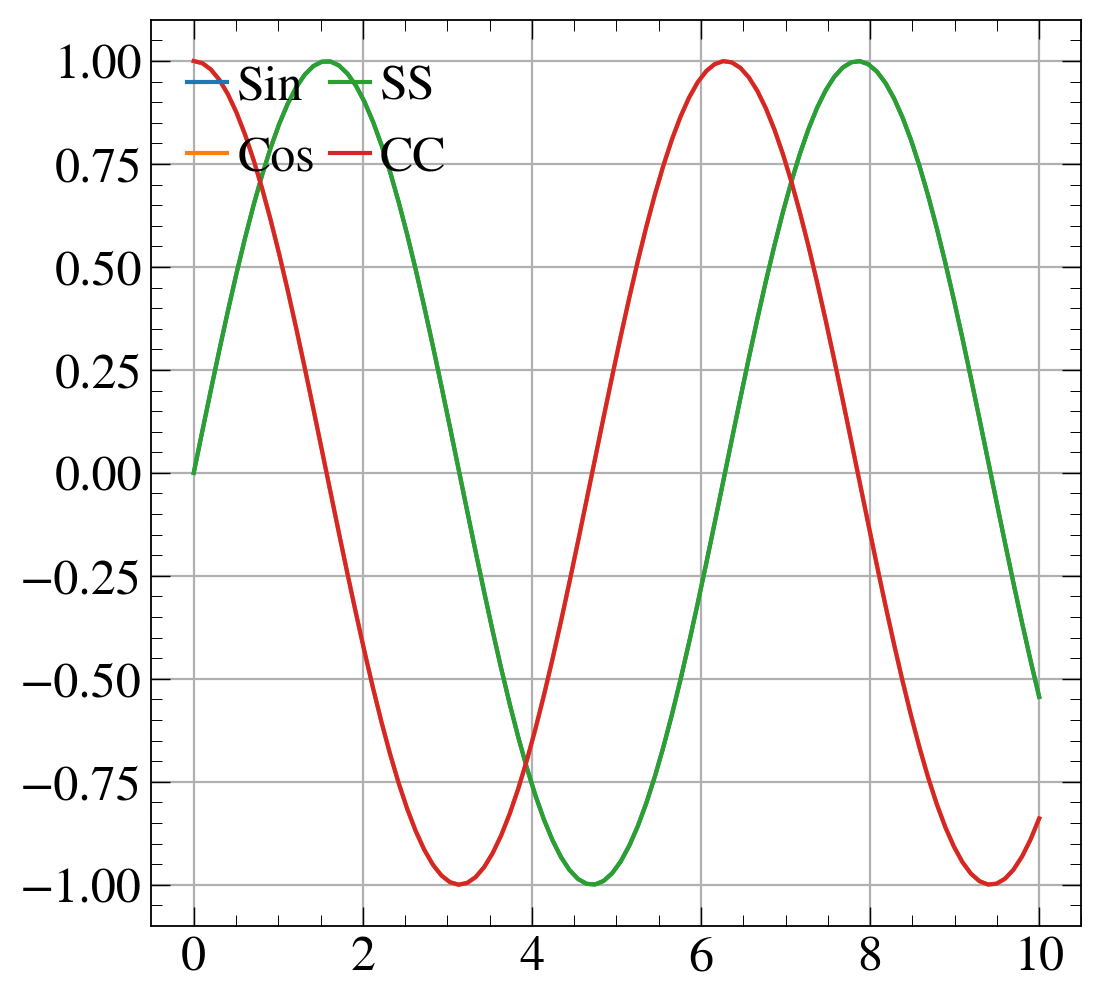

In [54]:

import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a plot
fig, ax1 = plt.subplots()

# Plot data
ax1.plot(x, y1, label='Sin')
ax1.plot(x, y2, label='Cos')
ax1.plot(x, y1, label='SS')
ax1.plot(x, y2, label='CC')

# Customize the legend
legend = ax1.legend(loc='upper left', bbox_to_anchor=(-0.01, 1), frameon=0, ncol=2, 
                    handletextpad=0.2, 
                    columnspacing=0.3,
                    markerscale=0.8,  # Scale down the size of the markers
                    handlelength=0.8)  # Adjust location and columns

# Show the plot
plt.show()

# Load redmapper clusters

In [ ]:
redmapper = gcr.load_catalog('skysim5000_v1.1.1_redmapper_v0.8.5')
redmapper_cl = Table(redmapper.get_quantities(['cluster_id','ra','dec','redshift','richness','clusters/z_lambda','clusters/mem_match_id'])) #46491
# redmapper_me = Table(redmapper.get_quantities(['cluster_id_member','dec_member','ra_member','p_member'])) #2381320
print(len(redmapper_cl))

In [ ]:
redmapper_cl = redmapper_cl[(redmapper_cl['redshift']>=0.35) & (redmapper_cl['redshift']<0.5)]

def n_greater_than_lambda(data):
    for i in range(len(data)):
        lambda_values = np.arange(data[i].min(), data[i].max(), 10)
#         print(lambda_values)
        n_greater_than_lambda = np.zeros(lambda_values.shape)
        for j in range(len(lambda_values)):
            n_greater_than_lambda[j] = np.count_nonzero(data[i] > lambda_values[j]) #/ len(data[i])
#         print(n_greater_than_lambda)
        plt.yscale('log')
        plt.xscale('log')
        plt.plot(lambda_values, n_greater_than_lambda, label=labels[i])

    plt.xlabel('$\lambda$')
    plt.ylabel('n(>$\lambda$)')
#     plt.xlim(20,None)
#     plt.ylim(None,4e3)
    plt.legend()
    plt.show()

# Generate some data
# cluster_CC9['lam'],cluster_CC20['lam'],cluster_CC50['lam'],cluster_CC100['lam'],cluster_CC500['lam'], clusterZC0101['lam'],clusterZC0303['lam'],clusterZC11['lam']
# clusterZC0101['lam'],clusterZC0303['lam'],clusterZC11['lam']  'ZC0101', 'ZC0303', 'ZC11'

data = [cluster_CC9['lam'],cluster_CC20['lam'],cluster_CC50['lam'],cluster_CC100['lam'],cluster_CC500['lam'],redmapper_cl['richness']] #cluster_30['lam'],cluster_60['lam'],cluster_90['lam'],cluster_120['lam'],
labels = ['CC9', 'CC20', 'CC50', 'CC100', 'CC500' ,'redmapper']   

n_greater_than_lambda(data)

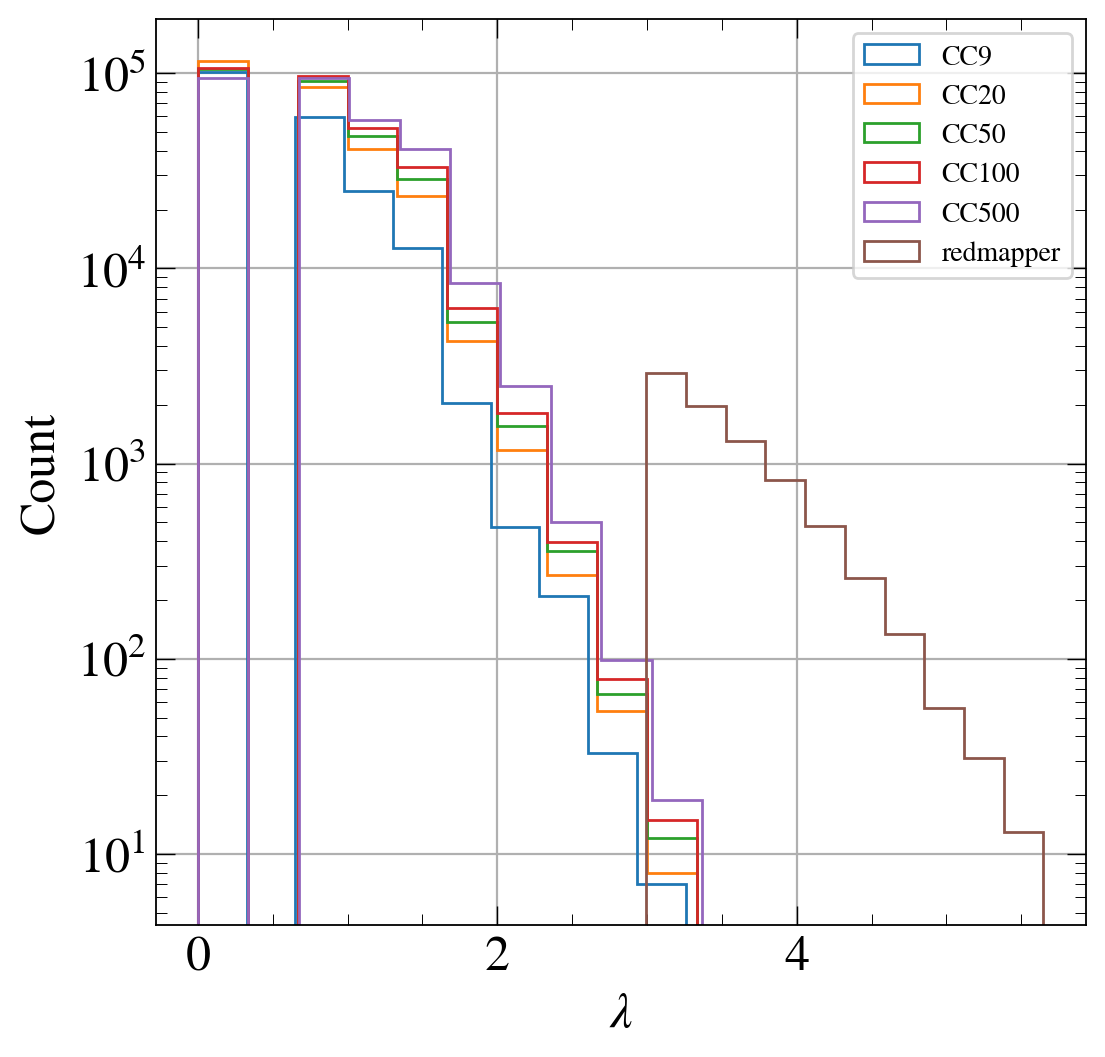

In [61]:
plt.hist(np.log(cluster_CC9['lam']), label='CC9',  histtype='step')
plt.hist(np.log(cluster_CC20['lam']), label='CC20', histtype='step')
plt.hist(np.log(cluster_CC50['lam']), label='CC50', alpha=1, histtype='step')
plt.hist(np.log(cluster_CC100['lam']), label='CC100', alpha=1, histtype='step')
plt.hist(np.log(cluster_CC500['lam']), label='CC500', alpha=1, histtype='step')
plt.hist(np.log(redmapper_cl['richness']), label='redmapper',  histtype='step')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$')  # Adjusted to put 'lam' on the x-axis
plt.ylabel('Count')
plt.legend(loc='best',fontsize=10)
plt.show()